In [1]:
using Distributions, TimeIt, ProgressMeter, PyPlot, JLD
include("temp.jl")

run_sampler (generic function with 4 methods)

In [2]:
X, y, ξ_true = load("data.jld", "X", "y", "xi_true")
d, Nobs = size(X)
σ02 = 1
my_pr = SS_prior(d, σ02)
my_ll = ll_logistic_sp(X,y)
my_model = model(my_ll, my_pr);

In [3]:
include("temp.jl")

run_sampler (generic function with 4 methods)

In [4]:
# Sub-sampling without control variates and with weights:
mb_size_list = 2*(1:10)
max_attempts = 10^7
lambda = 1e1
Print = false

false

In [5]:
start_overall = time()
for mb_size in mb_size_list 
    start = time()
    run_sampler(my_model, lambda, max_attempts, mb_size, Print) 
    print("Sampling for mb_size = ", mb_size, " in ", round((time()-start)/60,1), " mins \n")
end
print("Overall in ", round((time()-start_overall)/60,1), " mins")

Sampling for mb_size = 2 in 110.9 mins 
Sampling for mb_size = 4 in 104.8 mins 
Sampling for mb_size = 6 in 111.0 mins 
Sampling for mb_size = 8 in 105.9 mins 
Sampling for mb_size = 10 in 100.7 mins 
Sampling for mb_size = 12 in 105.9 mins 
Sampling for mb_size = 14 in 116.5 mins 
Sampling for mb_size = 16 in 113.1 mins 
Sampling for mb_size = 18 in 119.2 mins 
Sampling for mb_size = 20 in 116.4 mins 
Overall in 1104.5 mins

mb size = 2.0 slowest mixing = 324.9
mb size = 4.0 slowest mixing = 747.3
mb size = 6.0 slowest mixing = 592.8
mb size = 8.0 slowest mixing = 778.4
mb size = 10.0 slowest mixing = 824.9
mb size = 12.0 slowest mixing = 729.9
mb size = 14.0 slowest mixing = 657.6
mb size = 16.0 slowest mixing = 638.4
mb size = 18.0 slowest mixing = 699.1


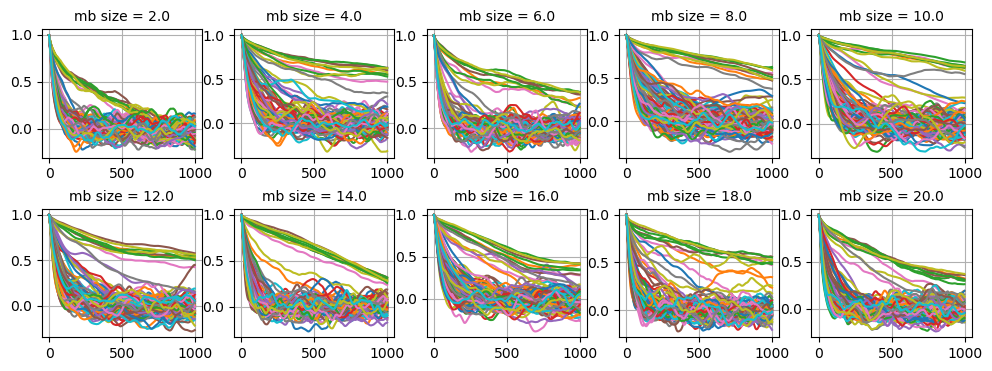

mb size = 20.0 slowest mixing = 577.2


In [7]:
fig = figure("pyplot_barplot",figsize=(12,4))
n_samples = 10^4
maxlag = 1000
discard = 0
iacts = zeros(10)
for j in 1:2 
    for i in 1:5
        k = (j-1)*5+i
        filename  = "/xtmp/GZZ_data/shrinkage_prior/synthetic_data/lambda:"*
        string(lambda)*"-d:"*string(d)*"-Nobs:"*
        string(Nobs)*"-mb_size:"*string(mb_size_list[k])*".jld"
        xt_skel, bt_skel = load(filename, "xt_skeleton", "bt_skeleton")
        xi_samples = extract_samples(xt_skel[:,discard+1:end], 
                                     bt_skel[:,discard+1:end], 
                                    (bt_skel[end]-bt_skel[discard+1])/n_samples,
                                    "linear")[:,1:end-1];
        subplot(2,5,k)
        for dim in 1:size(xi_samples,1)
            plot(acf(xi_samples[dim,:],maxlag))
            title("mb size = "*string(round(mb_size_list[k],3)), fontsize=10)
            grid(true)
        end
        iacts[k] = maximum([sum(acf(xi_samples[dim,:],maxlag)) for dim in 1:size(xi_samples,1)])
        print("mb size = "*string(round(mb_size_list[k],2)), " slowest mixing = ", 
                round(iacts[k],1), "\n")
        xt_skel, bt_skel, xi_samples = [], [], []
        gc()
    end
end
subplots_adjust(hspace=0.4)